In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append("../")
import folderparser as fp
import folderscraper as fs
import interfacemetrics as intm
from interfacePlots import *
from config import cfg
import logging

In [3]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [119]:
SERVERFOLDER = os.path.join(cfg.path.server, r'conicalNozzle')
EXPORTFOLDER = os.path.join(cfg.path.fig, 'conicalNozzle', 'plots')
TOPFOLDERS = [os.path.join(SERVERFOLDER, s) for s in ['orig', 'horizontal', 'speed_sweep', 'visc_speed', 'diameter', 'k', 'newtonian']]

# Generating Files

In [125]:
fs.populate(os.path.join(TOPFOLDERS[0], 'cn0'))

INFO:root:Exported file //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\conicalNozzle\orig\cn0\legend.csv


[['folder', 'cn0'],
 ['compare to', '', ''],
 ['snappyHexMesh time', '492.92', 's'],
 ['snappyHexMesh time', '8.22', 'min'],
 ['interFoam time s', '132348.00', 's'],
 ['interFoam time hr', '36.76', 'hr'],
 ['simulation time', '2.5', 's'],
 ['simulation rate', '14.71', 'hr/s'],
 ['', ''],
 ['', ''],
 ['mesh', ''],
 ['GEOMETRY', ''],
 ['nozzle inner width', ' 0.603', 'mm'],
 ['nozzle thickness', ' 0.152', 'mm'],
 ['bath width', '9.668', 'mm'],
 ['bath depth', '4.241', 'mm'],
 ['nozzle length', '1.819', 'mm'],
 ['bath left coord', '-4.834', 'mm'],
 ['bath right coord', '4.834', 'mm'],
 ['bath front coord', '2.1205', 'mm'],
 ['bath back coord', '-2.1205', 'mm'],
 ['bath bottom coord', '-2.1205', 'mm'],
 ['bath top coord', '2.1205', 'mm'],
 ['nozzle bottom coord', '0.3015', 'mm'],
 ['nozzle center x coord', '-2.412', 'mm'],
 ['nozzle center y coord', '0.0', 'mm'],
 ['nozzle angle', ' 0', 'degrees'],
 ['horizontal', False, ''],
 ['bath velocity', '0.01', 'm/s'],
 ['ink velocity', '0.01', 'm/

In [128]:
import pandas as pd
o = []
for topfolder in TOPFOLDERS:
    for f in fp.caseFolders(topfolder):
        l = fp.legendUnique(f)
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
fn = os.path.join(cfg.path.fig, 'conicalNozzle', 'legend_general.csv')
p.to_csv(fn)
logging.info(f'Exported {fn}')

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\legend_general.csv


In [191]:
for topfolder in TOPFOLDERS:
    for folder in fp.caseFolders(topfolder):
        intm.sumAndSteady(folder, False)

# Plots

### nozzle angle, bath size

In [298]:
time = 2.5
x = 5
labels = ['arean', 'vertdispn', 'aspectratio', 'speeddecay']
xvar = 'nozzle_angle'
yvar = 'bath_depth'
imsize=1
kwargs = {'overwrite':True, 'xvar':xvar, 'yvar':yvar}

# export plots
exportMeta = False
exportMetrics = False
exportXS = False
exportPics = True
exportSteady = False
exportStress = False
piclist = ['y_viscy', 'x_viscx', 'y_umag', 'y_shearStressy']

for TOPFOLDER in [TOPFOLDERS[0]]:
    if exportMeta:
        # metadata
        txtPlots0(TOPFOLDER, EXPORTFOLDER, **kwargs)
        timePlots(TOPFOLDER, EXPORTFOLDER, **kwargs)
        runtimePlots0(TOPFOLDER, EXPORTFOLDER, **kwargs)

    if exportMetrics:
        # metrics: aspect ratio, speed, area
        qualityPlots0(TOPFOLDER, EXPORTFOLDER, time, x, labels=labels, cvar=yvar, **kwargs)

    if exportXS:
        # cross-sections
        XSPlots0(TOPFOLDER, EXPORTFOLDER, time, x, **kwargs)

    if exportPics:
        # images
        for ta in piclist:
            picPlots0(TOPFOLDER, EXPORTFOLDER, time, 0, tag=ta, **kwargs)

    if exportSteady:
        # stability
        steadyPlots(TOPFOLDER, imsize, EXPORTFOLDER, [0], **kwargs)

    if exportStress:
        # shear stress vs. position
        shearStressPlots0(TOPFOLDER, EXPORTFOLDER, time, cvar=xvar, bath_depth_list=[6.05], **kwargs)
        shearStressPlots0(TOPFOLDER, EXPORTFOLDER, time, cvar=xvar, bath_depth_list=[4.24, 4.35, 4.72, 5.12], **kwargs)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_y_viscy_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_x_viscx_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_y_umag_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\pics_y_shearStressy_t2.5_sigma_0_orig_xvar_nozzle_angle_yvar_bath_depth


In [338]:
kwargs = {'overwrite':True, 'xvar':xvar, 'yvar':yvar}
qualityPlots0(TOPFOLDERS[0], EXPORTFOLDER, time, x, labels=['aspectratio', 'speeddecay'], cvar='', bath_depth_list=[6.05], **kwargs)
[picPlots0(TOPFOLDERS[0], EXPORTFOLDER, time, 0, tag=ta, bath_depth_list=[6.05], adjustBounds=False, **kwargs) for ta in ['y_shearStressy', 'y_viscy']]

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\trace_across_orig_bath_depth_list_[6.05]


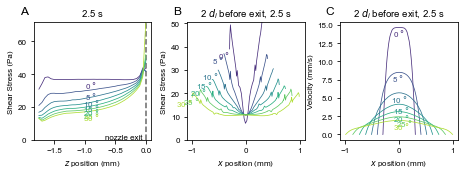

In [199]:
withinNozzle0(TOPFOLDERS[0], EXPORTFOLDER, 2.5, 2, zunits='nozzle_inner_width',
              bath_depth_list=[6.05], overwrite=True )

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\orig\xs_8nozzle_inner_width_t_2.5_orig_bath_depth_list_[6.05]_cvar_nozzle_angle_xvar_nozzle_angle_yvar_bath_depth


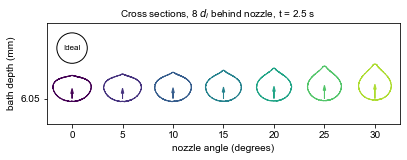

In [300]:
XSPlots0(TOPFOLDERS[0], EXPORTFOLDER, 2.5, 8, xunits='nozzle_inner_width', 
         bath_depth_list=[6.05], cvar='nozzle_angle', 
         xvar='nozzle_angle', yvar='bath_depth', overwrite=True)

### bath speed

In [278]:
time = 2.5
x = 2
xvar = 'vsup'
yvar = 'nozzle_angle'
labels = ['arean', 'vertdispn', 'aspectratio', 'speeddecay']
kwargs = {'overwrite':True, 'xvar':xvar, 'yvar':yvar}

# export plots
exportMeta = False
exportMetrics = False
exportXS = False
exportPics = True
exportSteady = False
exportStress = False

for TOPFOLDER in [TOPFOLDERS[2]]:
    if exportMeta:
        # metadata
        txtPlots0(TOPFOLDER, EXPORTFOLDER, **kwargs)
        timePlots(TOPFOLDER, EXPORTFOLDER, **kwargs)
        runtimePlots0(TOPFOLDER, EXPORTFOLDER, **kwargs)

    if exportMetrics:
        # metrics: aspect ratio, speed, area
        qualityPlots0(TOPFOLDER, EXPORTFOLDER, time, x, labels=labels, cvar=yvar, **kwargs)

    if exportXS:
        # cross-sections
        XSPlots0(TOPFOLDER, EXPORTFOLDER, time, x,  **kwargs)

    if exportPics:
        # images
        for ta in ['y_viscy', 'x_viscx', 'y_umag']:
            picPlots0(TOPFOLDER, EXPORTFOLDER, t, 0, tag=ta, adjustBounds=False, **kwargs)

    if exportSteady:
        # stability
        steadyPlots(TOPFOLDER, imsize, EXPORTFOLDER, [0], **kwargs)

    if exportStress:
        # shear stress vs. position
        shearStressPlots0(TOPFOLDER, EXPORTFOLDER, time, cvar=xvar, **kwargs)


INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\pics_y_viscy_t2.5_sigma_0_speed_sweep_xvar_vsup_yvar_nozzle_angle
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\pics_x_viscx_t2.5_sigma_0_speed_sweep_xvar_vsup_yvar_nozzle_angle
INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\pics_y_umag_t2.5_sigma_0_speed_sweep_xvar_vsup_yvar_nozzle_angle


In [198]:
withinNozzle0(TOPFOLDERS[2], EXPORTFOLDER, 2.5, 2, zunits='nozzle_inner_width', 
              cvar='vsup', overwrite=True , vsup_list=[5, 7.5, 10, 12.5, 15])

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\xs_8nozzle_inner_width_t_2.5_speed_sweep_cvar_vsup_xvar_vsup_yvar_nozzle_angle_vsup_list_[5, 7.5, 10, 12.5, 15]


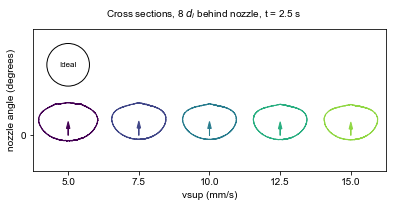

In [301]:
XSPlots0(TOPFOLDERS[2], EXPORTFOLDER, 2.5, 8, xunits='nozzle_inner_width', 
         cvar='vsup', xvar='vsup', yvar='nozzle_angle',
         vsup_list=[5, 7.5, 10, 12.5, 15], overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\speed_sweep\xs_5_t_5_speed_sweep_cvar_vsup_xvar_vsup_yvar_nozzle_angle_vsup_list_[2.5]


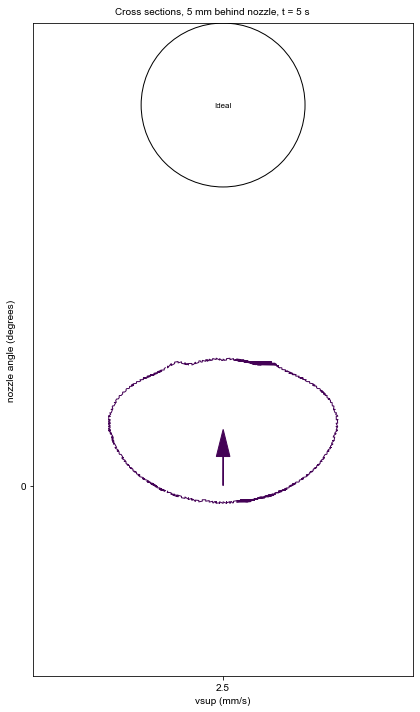

In [148]:
# withinNozzle0(TOPFOLDERS[2], EXPORTFOLDER, 5, 1, cvar='vsup', overwrite=True , vsup_list=[2.5])
XSPlots0(TOPFOLDERS[2], EXPORTFOLDER, 5, 5,  adjustBounds=False, cvar='vsup', xvar='vsup', yvar='nozzle_angle', vsup_list=[2.5], overwrite=True)

### diameter

In [263]:
topfolder = os.path.join(SERVERFOLDER, 'diameter')
for na in [0, 15]:
    withinNozzle0(topfolder, EXPORTFOLDER, 2.5, 2, zunits='nozzle_inner_width', cvar='nozzle_inner_width'
                  , nozzle_angle_list=[na], overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\xs_8nozzle_inner_width_t_2.5_diameter_cvar_nozzle_inner_width_xvar_nozzle_inner_width_yvar_nozzle_angle


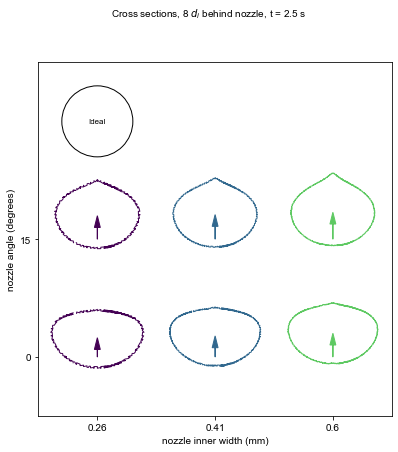

In [303]:
XSPlots0(topfolder, EXPORTFOLDER, 2.5, 8, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='nozzle_inner_width', yvar='nozzle_angle', overwrite=True)

INFO:root:Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\conicalNozzle\plots\diameter\xs_4nozzle_inner_width_t_1_diameter_cvar_nozzle_inner_width_xvar_nozzle_inner_width_yvar_nozzle_angle


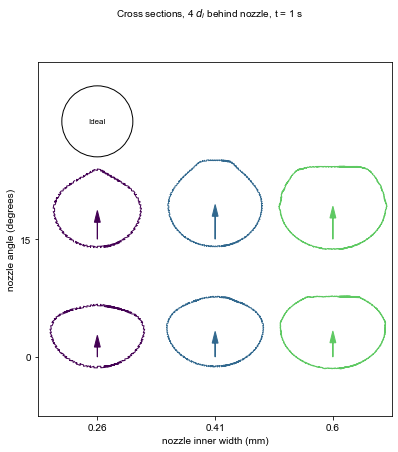

In [302]:
XSPlots0(topfolder, EXPORTFOLDER, 1,4, xunits='nozzle_inner_width'
         , cvar='nozzle_inner_width', xvar='nozzle_inner_width', yvar='nozzle_angle', overwrite=True)